## Statsmodels 이용한 시계열 자료 분석

## 7-6. Statsmodels 
- 다양한 통계 모형의 추정과 통계 검정, 통계적 데이터 탐색을 다루는 클래스와 함수 제공 파이썬 모듈
- statsmodels 라이브러리와 시계열 자료에 대한 다양한 통계검정, 계절성과 경향성 같은 시계열 자료의 일반적 개념
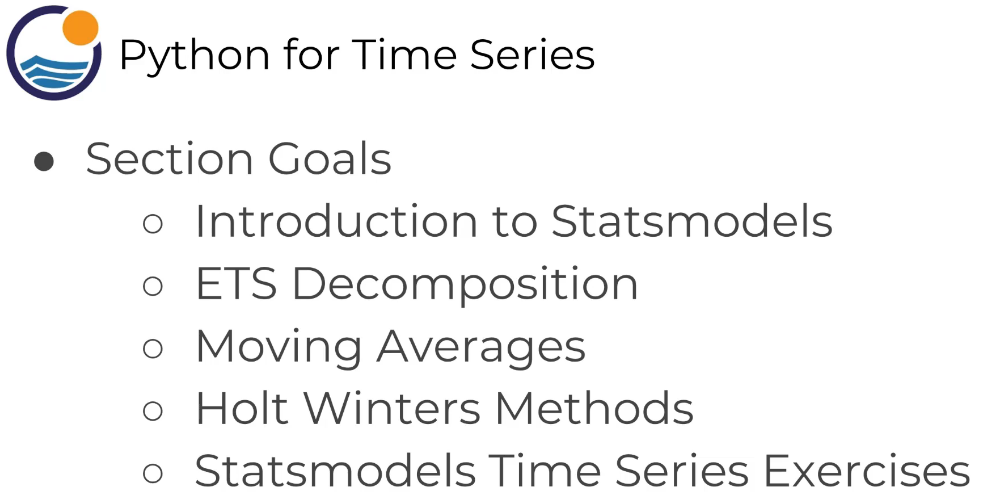

- ETS 분석법
- 이동평균
- 홀트-윈터스 기법
- Statsmodels의 새로운 기술 시험

## 7-7.  Statsmodels 라이브러리 입문
- statsmodels 라이브러리에서 함수를 호출해 통계 검정 하는 방법
- 호드릭-프레스콧 필터
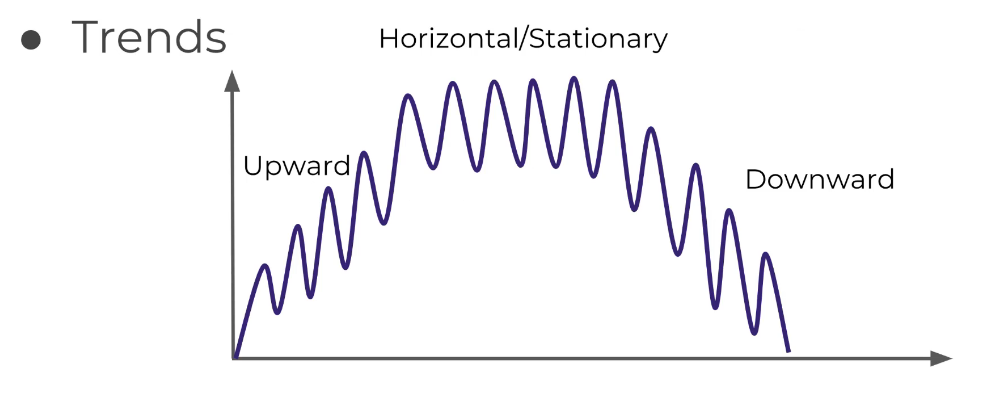

(1) Trends(추세) : 시계열 데이터는 경향성이 있는 경우가 있음. 
- 위 그림에 따라 시작부분 평균적인 기울기가 대체로 양의 값을 가지며, 위로 가는 추세
- 중간 : 수평 방향 또는 변하지 않는 추세 (위나 아래로 움직이지 않음)
- 오른쪽 : 아래로 내려가는 추세 
- 시계열 데이터는 이 세 가지 추세를 모두 보일 수 있으며, 한 가지의 추세를 가질 수도 수평방향, 혹은 변하지 않는 추세를 가질 수도 있음
- 시계열 데이터는 어떤 방향으로든 추세를 가짐

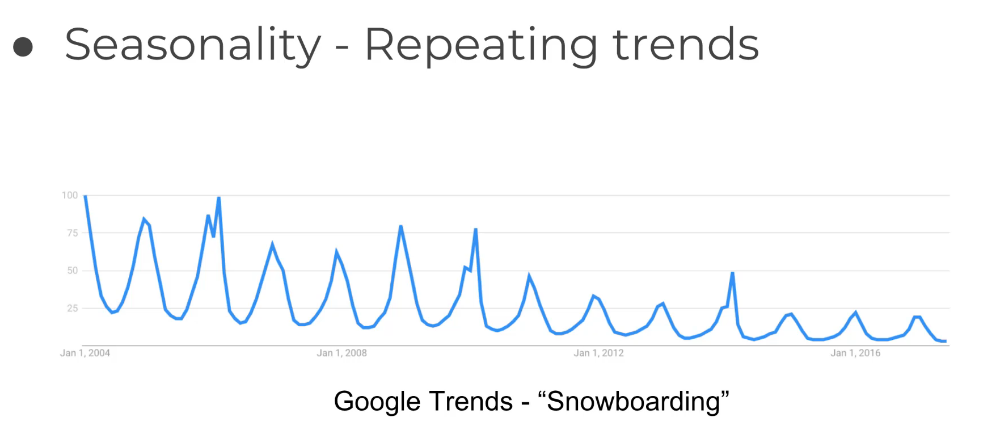

(2) 계절성 : 반복적인 추세
- 겨울인 11월부터 1월 사이에 사람들이 스노우보드나 스노우보딩을 더 많이 검색, 여름에는 눈이 내리지 않아 검색을 하지 않음
- 매 겨울마다 증가하고 여름마다 감소하는 경향 -> 반복적 추세
- `반복적 추세` : 잘 알려진 주기로 보이며, 매년 반복됨
- 위의 그림에서는 전반적인 추세가 감소하고 있는 것 역시 볼 수 있음(전체적인 총 검색량이 감소하고 있음)
- 시계열 데이터는 주기적으로 반복되는 추세인 `계절성`을 가질 수 있음
- 이러한 계절성은 `일정 주기 마다 반복`됨

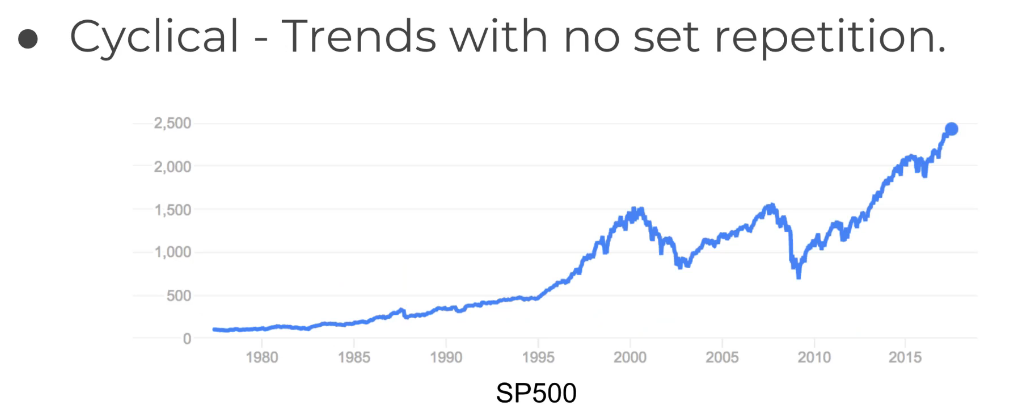 

(3) 순환 요소 (반복성이 없는)
- 위의 그림 미국 상위 500개 기업의 주가 합 S&P500 주가지수가 나타나 있고 몇 개의 추세를 볼 수 있음
- 증가하는 추세가 보이고, 불황 때는 감소하는 추세/ 상승 장일 때는 증가하다가 하락 장에서 다시 감소하는 추세
- 중요한 점은 위 그림에서는 반복적인 추세가 보이지 않음
- 이 추세가 5년 마다 반복된다고 말하기는 무리가 있음. 장기적으로 10년 안팎의 주기로 일종의 불황이 보이는 것 같지만, 앞의 스노우 보딩의 검색 결과처럼 매년 이런 주기를 바탕으로 예측하기 쉽다고 말하기는 어려움
- 주기가 매우 뚜렷하게 보인다면 `계절성`
- 어떤 데이터셋은 어쩔 때는 증가하고 어쩔 때는 감소해서 뚜렷한 주기가 보이지 않음 -> 현실의 많은 데이터들이 그러함
- 이러한 요소를 `순환`, `순환적 요소`라고 하는데, 특정 기간 동안 반복적 추세가 보이지 않음

### 호드릭-프레스콧 필터

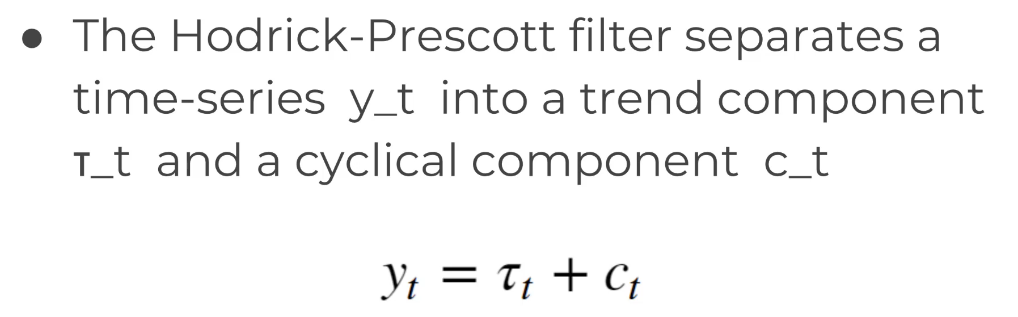

- yt로 표현되는 시계열 데이터를 `추세요소인 tt`와 `순환요소인 Ct`로 분해
- 기본적으로 호드릭-프레스콧 필터는 데이터의 추세 요소와 순환 요소 두 가지 요소를 찾아 분해함


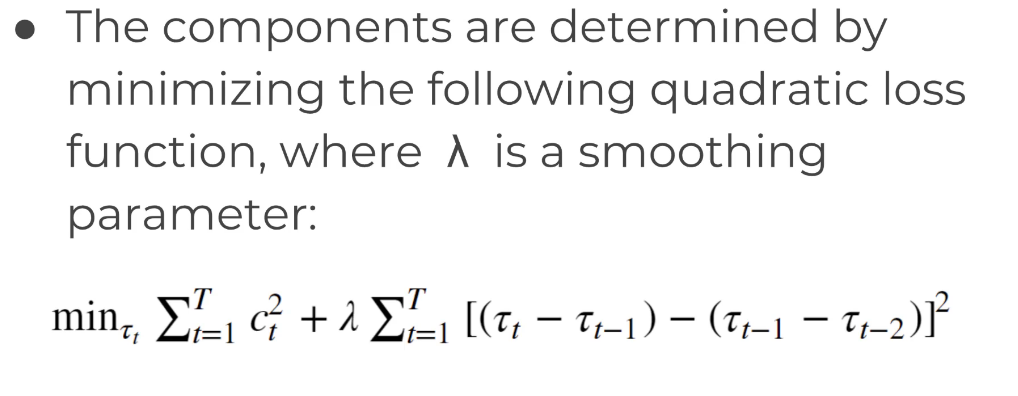


- 두 요소는 2차 손실 함수를 최소화 하는 값으로 결정 됨

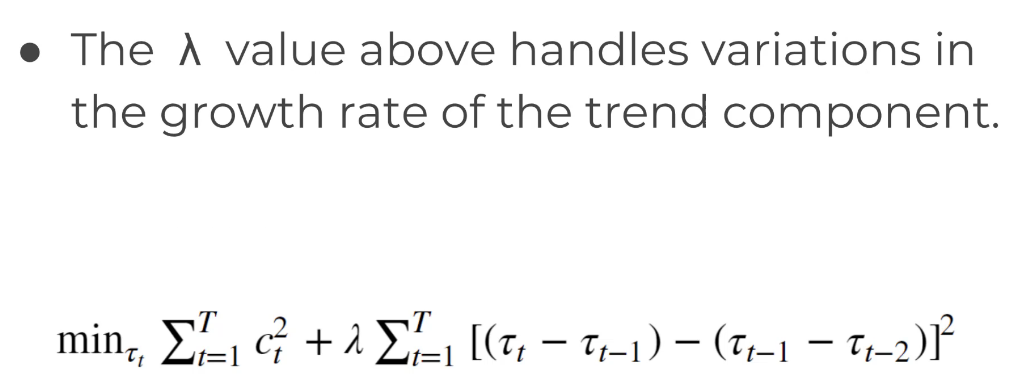

- 여기서의 `람다`는 `평활화 계수` 이며, 이 식이 호드릭 프레스콧 필터가 두 요소를 추출해내는데 사용되는 식으로 이를 최소화 하여 찾음
- `람다` 값은 **추세요소의 증가율 변동폭 조절** 
- `람다`는 데이터에 따라 사용하기 좋은 값이 미리 알려져 있음
- `분기별 데이터`는 1600, `연간 데이터` 6.25, `월간 데이터` 129,600 추천

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

In [4]:
df = pd.read_csv('data/macrodata.csv', index_col=0, parse_dates=True)
df

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959-03-31,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.980,139.7,2.82,5.8,177.146,0.00,0.00
1959-06-30,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.150,141.7,3.08,5.1,177.830,2.34,0.74
1959-09-30,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.350,140.5,3.82,5.3,178.657,2.74,1.09
1959-12-31,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.370,140.0,4.33,5.6,179.386,0.27,4.06
1960-03-31,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.540,139.6,3.50,5.2,180.007,2.31,1.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008-09-30,2008,3,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33
2008-12-31,2008,4,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91
2009-03-31,2009,1,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71
2009-06-30,2009,2,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19


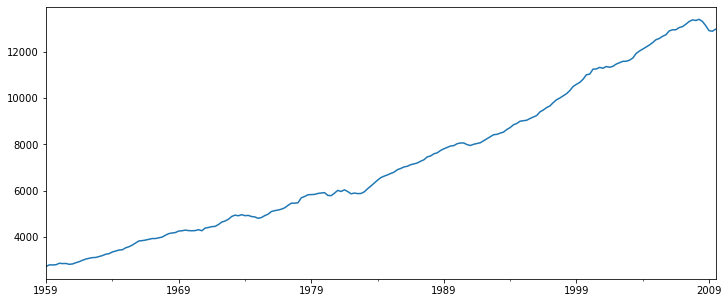

In [6]:
df['realgdp'].plot(figsize=(12,5));

-> 상승하는 것을 볼 수 있으나, 2008년 불황으로 움푹 파인 부분이 보임
- Statsmodels을 이용해 추세를 찾아내는 것 (호드릭-프레스콧 필터로 추세와 순환 요소를 분리할 수 있음

In [9]:
from statsmodels.tsa.filters.hp_filter import hpfilter

In [11]:
# 분기별 데이터를 사용하기 때문에 람다를 1600

gdp_cycle, gdp_trend = hpfilter(df['realgdp'], lamb=1600)

# 위 함수는 튜플로 반환함

In [13]:
print(type(gdp_cycle), type(gdp_trend))

<class 'pandas.core.series.Series'> <class 'pandas.core.series.Series'>


- gdp_cyle, gdp_trend 실제 변수형은 시리즈임

In [19]:
df['trend'] = gdp_trend
df

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint,trend
1959-03-31,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.980,139.7,2.82,5.8,177.146,0.00,0.00,2670.837085
1959-06-30,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.150,141.7,3.08,5.1,177.830,2.34,0.74,2698.712468
1959-09-30,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.350,140.5,3.82,5.3,178.657,2.74,1.09,2726.612545
1959-12-31,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.370,140.0,4.33,5.6,179.386,0.27,4.06,2754.612067
1960-03-31,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.540,139.6,3.50,5.2,180.007,2.31,1.19,2782.816333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008-09-30,2008,3,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33,13222.581545
2008-12-31,2008,4,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91,13249.189472
2009-03-31,2009,1,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71,13274.457706
2009-06-30,2009,2,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19,13299.061073


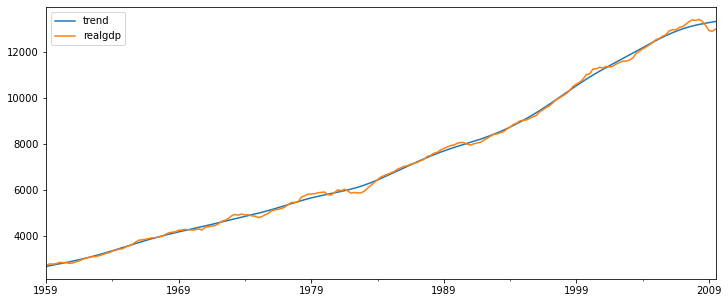

In [21]:
df[['trend', 'realgdp']].plot(figsize=(12,5));

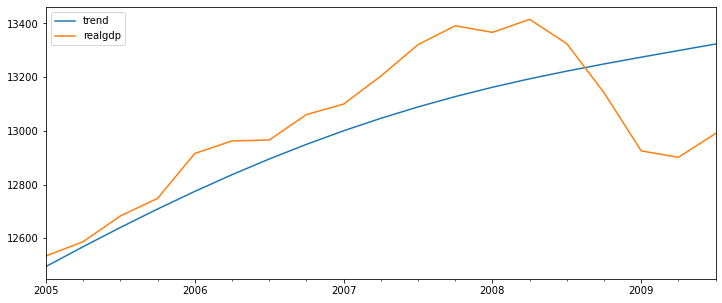

In [23]:
# 특정 부분 확대 2008년 이후의 대불황 같이 특정한 데이터를 확대하고 싶으면

df[['trend','realgdp']]['2005-01-01':].plot(figsize=(12,5));

## 7-8.ETS 모델

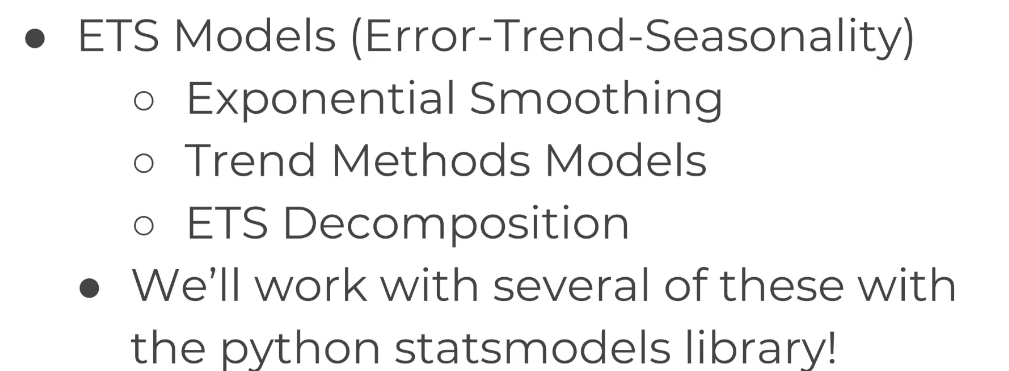

- ETS 모델은 오차(E), 추세(T), 계절성(S)의 줄임말
- 지수평활법과 ETS 분해, 추세모형과 같이 다양한 모델을 표현하는 일반적인 표현
- ETS 모델은 오차(E), 추세(T), 계절성(S) 세 요소를 더하거나, 곱하거나 혹은 일부를 사용하지 않고 데이터를 평활화 함

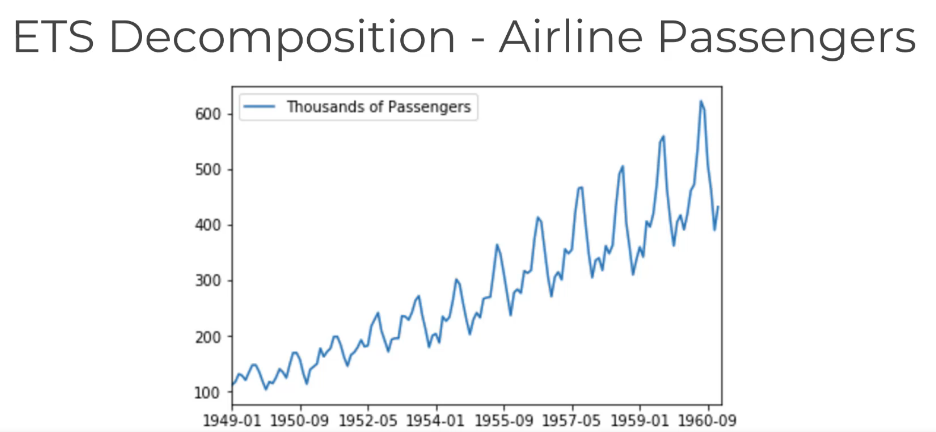

- 1949년 부터 1960년 말까지 월간 승객수를 천명 단위로 나타내는 항공 승객 수 데이터셋
- 전체적으로 증가하는 것이 보이는데 (추세 요소)
- 선형 추세와, 지수형 추세로 둘 다 혹은 증가 혹은 감소할 수 있음
- 원시 데이터에서 확실히 말하기 어려워 추세 요소를 분리하면 좋음
- 평균적인 추세만 본다면 선형으로 상승? 지수형으로 상승?
- 원시 데이터에서 확실하게 알기 어려운 것은 추세에 더해 계절성이 보이기 때문
- 월별마다 변동이 반복되는 경향이 보임. 여름방학이 있고 날씨가 좋아 휴가를 많이 가는 여름기간의 승객수가 늘어남
- 연휴마다 반복되는 승객 수의 피크 값 을 볼 수 있음
- 증가하는 전반적인 추세에 더해 매 해 반복되는 계절성이 보임

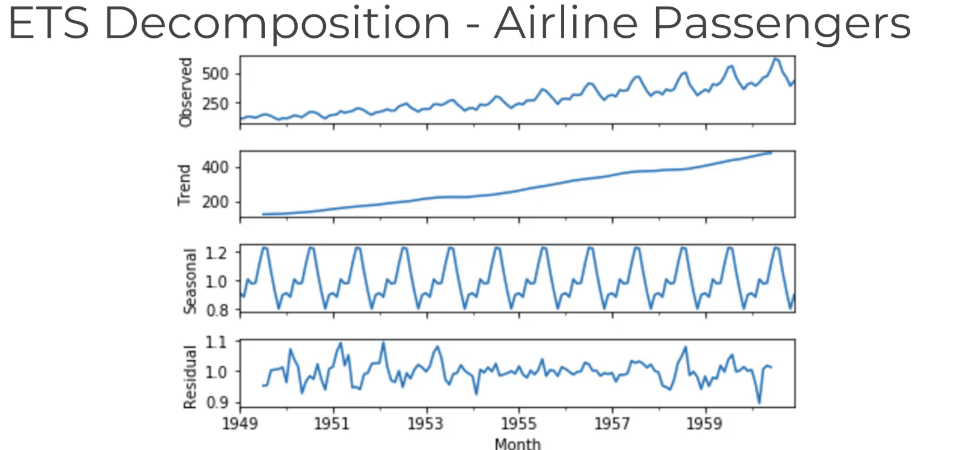

- ETS를 분해하면, datetime을 x축으로 그려진 네 개의 플롯들을 리턴함
- 제일 위 : 원본 데이터
- 순서대로 TS 분해로 나눠진 추세, 계절성, 잔차(오차)항 
- 추세로 전반적인 상승으로 지수형인지 선형인지 더 잘 확인할 수 있음
- 계절성 : 추세 요소를 제거한 것, 반복되는 계절성 요소 직선화
- 잔차요소 : 추세나 계절성으로 설명되지 않는 것, 잡음과 비슷하게 보임(데이터셋의 어디에 노이즈가 많은지, 그렇지 않은지 나타내줌)
- 위의 그림에서는 데이터셋의 앞부분이 중간부분보다 잡음이 더 많은 오차나 잔차가 더 큰 것으로 보임

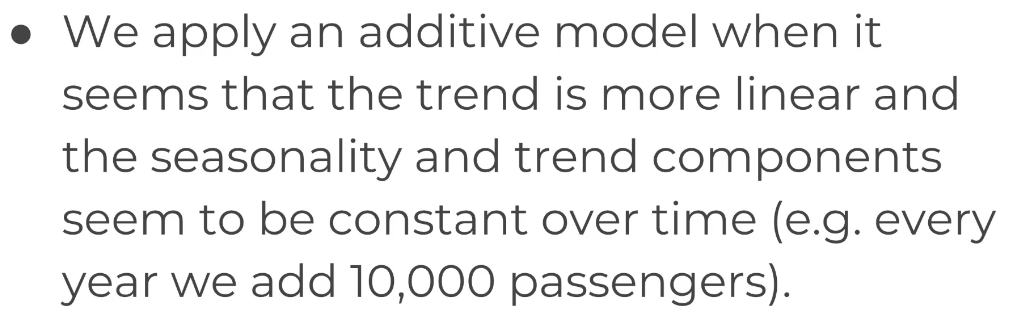

- ETS 모델에는 (1) 덧셈 모델 (2) 곱셈 모델 이 있음
- 덧셈 모델은 매년 만명의 승객이 증가하는 것 같이, 추세가 선형에 더 가깝고 계절성이 거의 일정해 보일 때 적용
- 곱셈 모델은 매년 승객의 수가 전년도에 비해 두배로 늘어나는, 즉 지수적 증감하는 경우와 같이 비선형적으로 증가 혹은 감소하는 경우에 적합

#### statsmodels 라이브러리를 이용하여 ETS 분해

In [39]:
df = pd.read_csv('data/airline_passengers.csv', index_col='Month', parse_dates=True)
df

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [40]:
df = df.dropna()
df

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


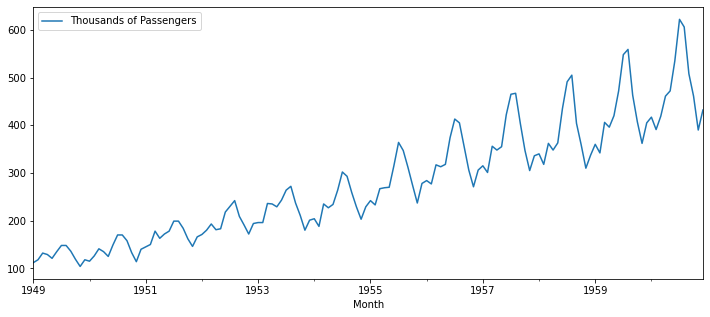

In [41]:
df.plot();

- 추세가 선형보다는 아주 살짝 더 가파르게 증가하는 것으로 보여 `곱셈 모델` 사용

In [42]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [43]:
result = seasonal_decompose(df['Thousands of Passengers'], model='multiplicative')
result

In [44]:
result.trend

Month
1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
              ..
1960-08-01   NaN
1960-09-01   NaN
1960-10-01   NaN
1960-11-01   NaN
1960-12-01   NaN
Name: trend, Length: 144, dtype: float64

- 추세가 충분히 정해진 뒤 실제 값이 나타남

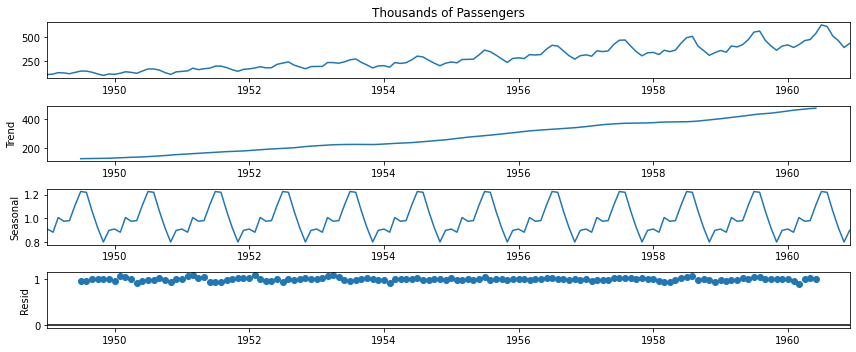

In [45]:
from pylab import rcParams
rcParams['figure.figsize'] = (12,5)

result.plot();

### 7.9 EWMA 이론

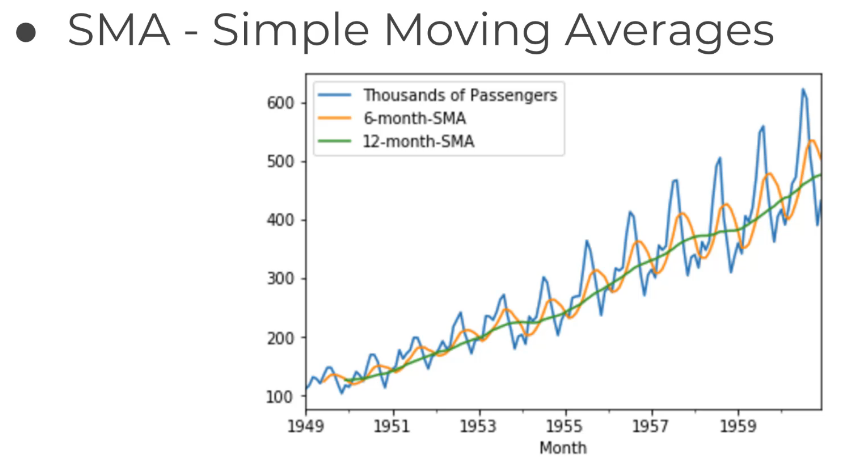

- 1000명 단위의 승객 수 데이터 셋 단순 이동 평균 하면, 이동 평균 기간에 따라 다르긴 하나 데이터의 전반적인 특징 볼 수 있음
- 이동 평균 기간을 12개월로 길게 잡는 다면 전반적인 추세를 얻을 수 있음
- 반대로 이동 평균 기간이 짧을 때는 주황색 선으로 표시된 6개월 단순 이동 평균 자료에서 보이듯 어느 정도의 계쩔성을 포함한 시계열 데이터의 전반적이 특징을 얻을 수 있음
- 이렇게 단순 이동 평균을 이용해 분석하고자 하는 실제 시계열 데이터를 설명하는 일반적인 모델을 만들 수 있음

- 지수 평균 이동 평균의 개념을 이용해, 단순 이동 평균의 개념 확장하기
- 단순 이동 평균의 문제점은 전체 모델이 이동 평균 기간으로 제한됨
- 앞에서 6개월, 12개월의 이동 평균에서 보듯이, 데이터 셋의 길이가 12개월이나 6개월보다 훨씬 길더라도 데이터 셋 전체에 똑같이 적용됨
- 데이터셋의 길이가 10년이나 100년이 되어도, 그 데이터에 대해서 하나의 이동 평균 기간 밖에는 적용할 수 없음
- 최근의 자료들이 오래된 자료보다 가중된다면 좋을 것임. 최근의 자료는 다가올 미래의 결과를 조금 더 반영하고 있기 때문
- 이 때는 단순 이동 평균(SMA) 대신 `EWMA`를 이용
- **`EWMA`** 는 **`지수 가중 이동 평균`** 을 의미하고 단순 이동 평균의 단점을 보완함
- 단순 이동 평균(SMA)의 약점은 짧은 이동 평균 기간을 이용하면 신호보다 잡음이 커질 수 있음
- 이동 평균 기간이 짧아질 수록 시계열 데이터를 더 잘 설명할 수 있으나, 잡음이 커지기 때문에 적절한 이동 평균 기간을 찾는 것은 어려움
- 단순 이동 평균을 하게 되면, 이동 평균 기간만큼 시차가 생김
- 그리고 평균을 함으로 인해서 원래 데이터의 극대값과 극소값에 못 미치는 값을 보임
- 위의 그래프에서 이동 평균 기간이 매우 짧더라도, 이동 평균한 데이터가 원래 데이터의 극대값과 극소값에 미치지 못함을 보임
- 단순히 현재 데이터의 일반적인 추세만 보여줌
- 또한 극단적으로 크거나 작은 값은 단순 이동 평균을 왜곡 시킬 수 있음
(불황기가 포함된 경제 데이터를 모델하려 한다면 이동 평균 기간이 완전히 불황기를 지날 때 까지 계속 경기 침체가 있는 것으로 나타남 -> 부정확)
- 이러한 문제를 지수 가중 이동 평균(**`EWMA`**)을 사용해 해결할 수 있음
- EWMA는 최근의 값들에 가중치를 적용함으로써, 단순 이동 평균에서의 시차 효과를 감소 시킬 수 있음
- 지수 가중 이동 평균이라는 이름에서 나타나있듯 지수적으로 가중 됨
- 가장 최근 값에 적용되는 가중치는 EWMA 매개변수에 의해 결정되며, 이동 평균 기간에 따라서도 변화함

## 7-10. EMMA 지수 가중 이동 평균(14분)

In [50]:
df = pd.read_csv('data/airline_passengers.csv', index_col='Month', parse_dates=True)
df

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [51]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [52]:
df.dropna(inplace=True)

In [53]:
df.index= pd.to_datetime(df.index)
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [56]:
df['6-month-SMA']= df['Thousands of Passengers'].rolling(window=6).mean()

In [57]:
df['12-month-SMA'] = df['Thousands of Passengers'].rolling(window=12).mean()

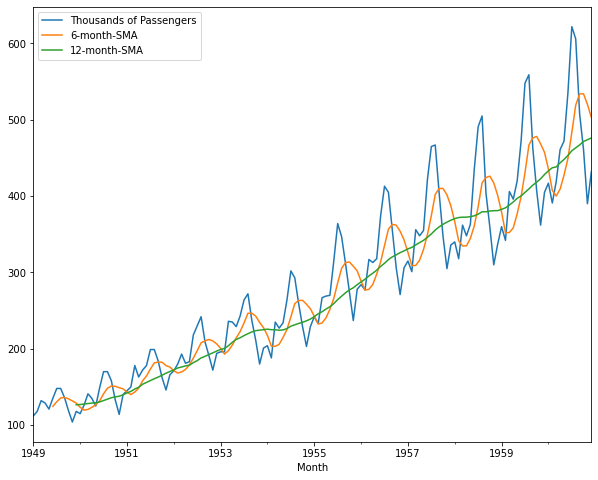

In [59]:
df.plot(figsize=(10,8));

- 위는 rolling 메소드를 이용해 단순 이동 평균을 하는 방법

#### 지수 가중 이동 평균 하기(EWMA)
- 작은 이동 평균 기간이 더 큰 잡음을 만드는 것
- 이동 평균 기간에 무관하게 시차가 있는것, 평균으로 인해 극대값과 극소값에도달하지 못하는 것
- 미래 양상을 대한 정보를 주지 않고, 데이터의 전반적인 추세만 보이는 것을 보완함

In [60]:
df['EWMA-12'] = df['Thousands of Passengers'].ewm(span=12).mean()

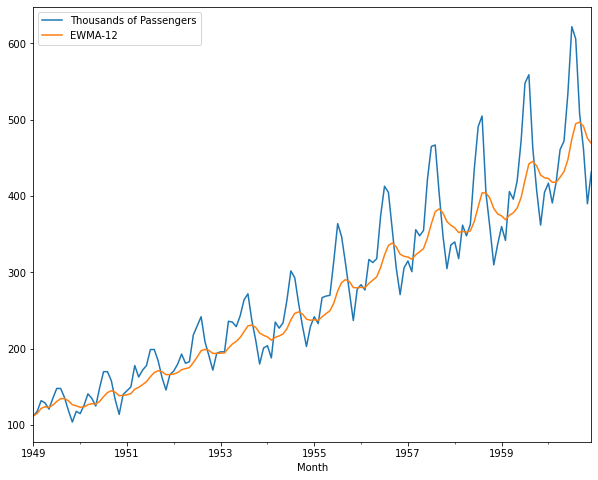

In [62]:
df[['Thousands of Passengers', 'EWMA-12']].plot(figsize=(10,8));

- 시작 부분과 끝 부분이 조금 다르게 보임, 계절성 추세가 시작부분에서 끝 부분을 갈 수록 잘 보임
- 오래된 자료 보다 최신의 자료에 더 큰 가중치를 주었기 때문에

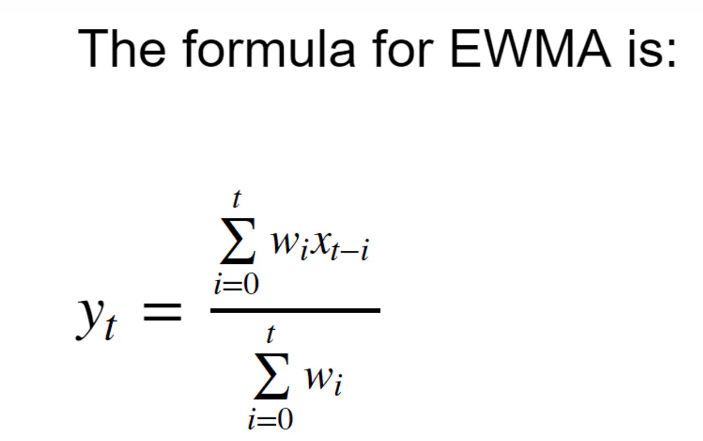

- 특정 시간 t에 대한 출력 값인 yt
- 입력값인 xt, 가중치인 wi
- t=0에서 t로 변할 때 wi 값도 변하게 됨
- 가중치 항인 wi를 어떻게 정할까? (이 값은 .ewm() 메소드에 넣는 adjust 매개변수의 값에 따라 결정 됨)

 
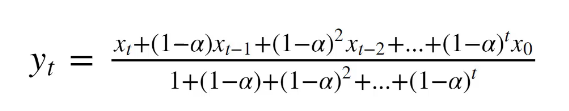

- 실제 출력 값인 yt는 분자에 xt+(1-a) xt-1+(1-a)2xt-2…(1-a)tx0까지 계속되는 값이 들어가고분모에는 분자의 계수인 가중치들의 합이 들어감
- 이 분자를 분모로 나누어주면 yt를 얻을 수 있음
- 위의 식은 기본적으로 아까 여기 위에서 본 식을 전개한 것과 같음
- wi를 (1-a)t로 바꾼 것과 같으며, 여기서 이 가중치는 시계열에서 멀어질수록 감소하게 되는 것을 볼 수 있는데 이는 알파가 0부터 1사이의 값을 갖기 때문
- 0부터 1 사의 값을 곱해주면 더 작은 값이 되며, 따라서 0부터 1사이의 값을 거듭제곱 하면 할 수록 더 작은 숫자가 됨
- 따라서 데이터가 오래될 수록 더 작은 가중치가 곱해지는 것을 알 수 있음
- 제일 첫 번째 데이터 포인트는 가장 작은 가중치가 곱해질 것이고 가장 최근의 데이터 포인트는 가장 큰 가중치, 즉 1이 곱해짐
- 반대로 adjust=False일 때 이동 평균은 다음과 같이 계산
- 우선 y0=x0으로 첫 번째 입력 자료는 첫 번째 출력 자료와 같음
- 그리고 나머지 출력 값들 yt=(1-a)yt-1+axt로
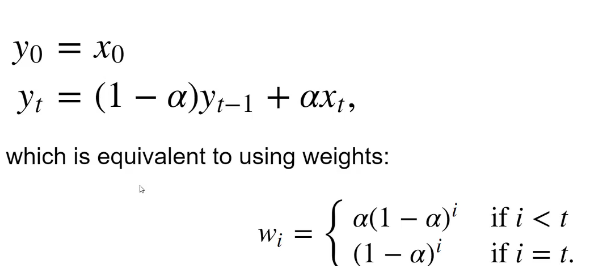
- i<t일 때 wi=a(1-a)i이고
- i=t일 때 wi=(1-a)i입니다


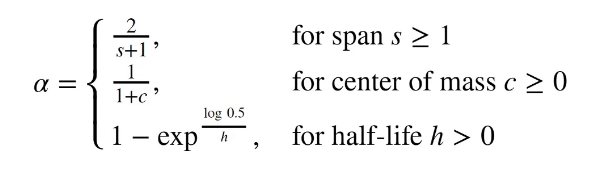

- span은 N일 이동 평균에 해당
- 만일 7일이든 14일이든 N일 지수 가중 이동 평균을 하고자 한다면 span인자를 통해서 이동 평균 기간을 정해주면 원하는 기간 만큼 지수 가중 이동 평균 가능
- span 인자는 이렇고 com인자는 화면에서 c로 표현
- C=(1-s)/2와 같은 값으로 기본적으로 span과 역관계
- 다음으로 반감기라는 의미를 지닌 halflife 인자는 지수적 가중치가 반으로 줄어드는데 걸리는 기간을 의미
- 알파 값을 직접 입력해 평활화 정도를 직접 정할 수도 있음
- 보통 지수 가중 이동 평균을 할 때 가장 쉬운 인자는 span

## 7-11. 홀트-윈터스 계절성 기법

- 간단히 하나의 평활 인자, 알파를 이용해 지수 평활을 하는 방법인 지수 가중 이동 평균(EWMA)
: 계절성이나 전반적 추세 등을 제대로 고려하지는 못함 -> 지수 평활 시 하나의 매개변수만 사용하기 때문에
- 홀트-윈터스 계절성 기법 : 예측식에 더해 세 개의 평활식으로 구성되어 있음
- 수준 l_t, 추세 b_t, 계절성 요소 s_t, 위 세식은 각각에 대응하는 평활 매개변수 알파, 베타, 감마를 갖음
- 이 방법은 계절성 요소의 성질에 따라 두 가지로 바뀔 수 있음
- 홀트-윈터스 계절성 기법에는 계절성 요소를 다루기 위한 두 방법이 있음
- (1) 덧셈 기법 : 계절성 요소가 전체 데이터에서 일정한 폭으로 나타날 때 이용
- (2) 곱셈 기법 : 계절의 변동폭이 데이터 수준에 비례해 나타날 때 사용

**`단일 지수 평활법`**
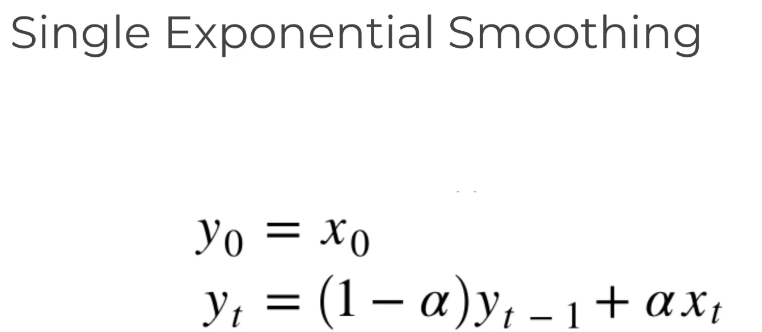

- 단일 지수 평활법에서 y0=x0 이고 다음으로 특정 시간 t에 대해 yt=(1-α)yt-1+axt 로 쓸 수 있음
- 이 식에서 홀트 기법이라고 알려진 이중 지수 평활법으로 전개하기 위해 추세를 나타내는 새로운 평활 매개변수인 베타가 추가됨

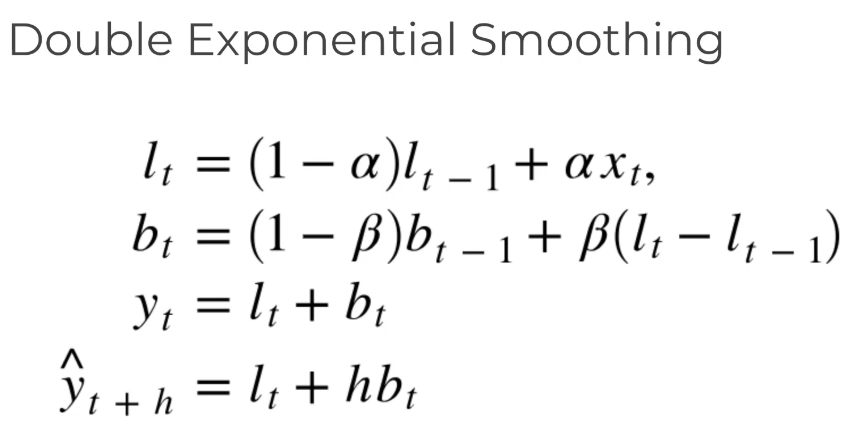
- 이 식들이 추세 요소에 대한 홀트 기법, 이중 지수 평활이라 불림
- 알파를 이용해 정의되어 특정 시간 t에서의 수준을 나타내는 lt와 전반적 추세로 정의되는 bt가 있고 이 식을 더해
yt = lt+bt가 되고 일정 기간 앞을 예측하는 yt+h=lt+bth로 표현됨

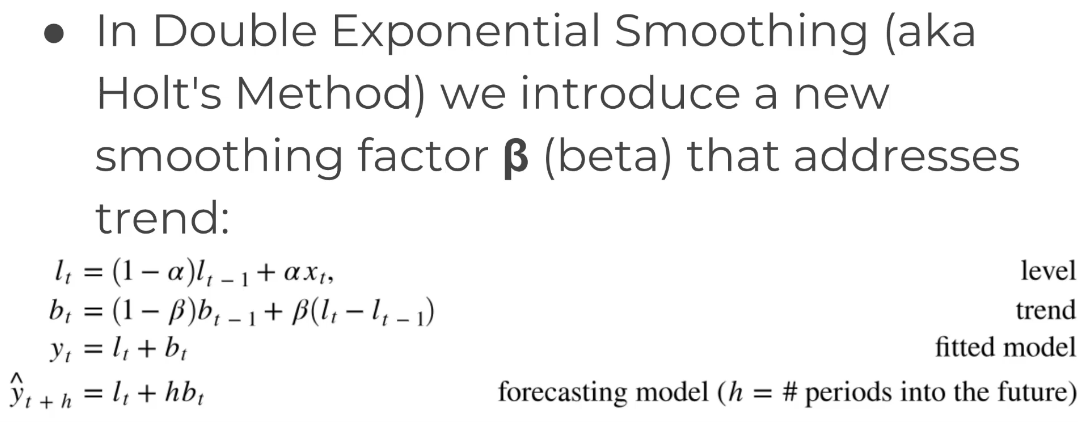
- 주어진 시간 t에 대한 실제 값인 yt는 lt+bt 가 되는데 이는 수준 요소와 추세 요소의 합과 같으며, 계절성 요소를 고려하고 있지 않음
- 이것이 홀트 기법이고 이중 지수 평활법인 이유는 알파 매개변수와 수준 요소만을 사용하지 않고 추세 요소를 표현하는 베타 매개변수가 추가됐기 때문
- 홀트 기법은 `시계열 데이터를 실질적인 값인 수준 요소와 추세, 두 가지 요소로 분리하는 개념`
- 여기까지는 아직 계절성 요소를 반영하지 않았기 때문에 예측 모델은 가장 최신의 데이터 포인트로부터 연장된 단순한 직선을 나타냄
- 아직 실질적 값을 나타내는 수준 요소와 증가, 감소를 나타내는 추세 요소만을 다루고 있음
- 항공 승객 수 데이터셋에 홀트 기법 즉, 이중 지수 평활법을 적용하면 항공 승객 수가 증가하는 것을 예측할 수 있음
- 겨울보다 여름에 승객 수가 더 증가하는 것을 어떻게 예측할수 있나?
- 홀트 기법으로는 전반적인 수준과 추세만을 예측할 수 있음
- 하지만 홀트-윈터스 계절성 기법, 혹은 삼중 지수 평활법으로는 가능함

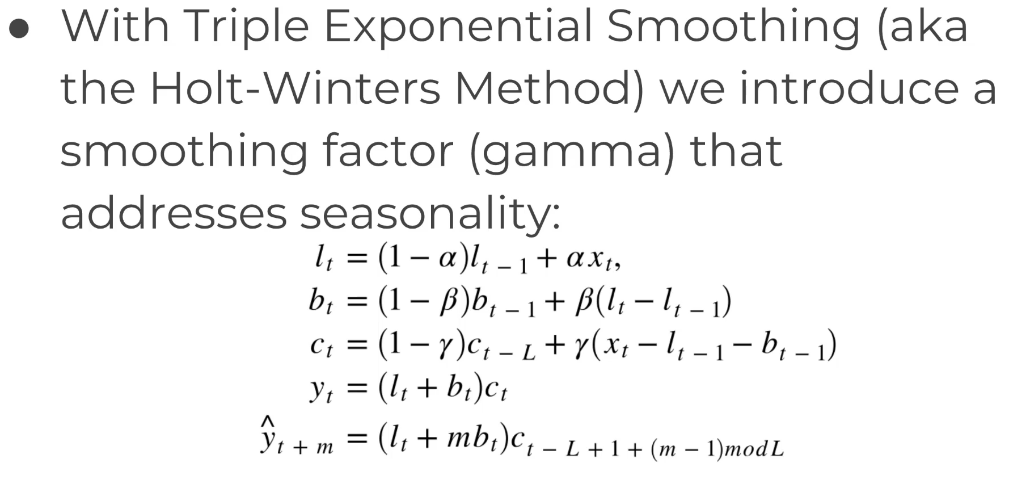

- 홀트-윈터스 계절성 기법으로도 알려진 삼중 지수 평활법에는 계절성을 표현하는 새로운 평활 매개변수인 감마가 추가됨
- 여기에는 아까의 식에 계절성 요소를 나타내는 ct라는 새로운 요소가 추가되고 이는 감마로 표현됨
- 이제 식에는 수준 요소인 lt, 추세 요소인 bt, 그리고 계절성 요소인 ct가 있고 이 각각을 조절하는 요소인 알파, 베타, 감마가 있으며, yt=(lt+bt)ct가 됨

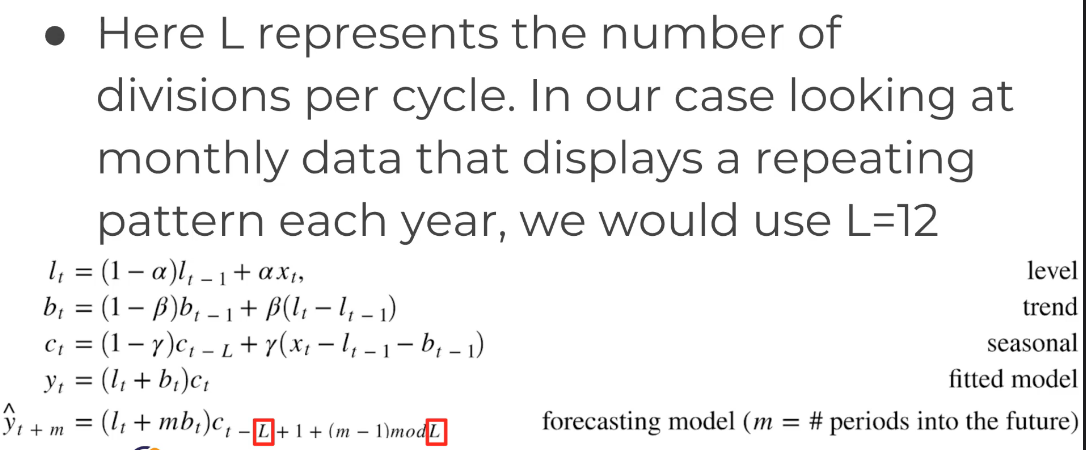

- 예측 모형의 L은 주기당 데이터 포인트의 수와 같음
예) 항공 승객 수 데이터를 기준으로는 1년마다 반복되는 월간 데이터이기 때문에 L은 12임

## 7-12. 홀트-윈터스 계절성 기법을 이용한 코드 짜보기 - Part 1

In [64]:
df = pd.read_csv('data/airline_passengers.csv', index_col='Month', parse_dates=True)
df

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [65]:
df = df.dropna()

- `홀트- 윈터스 계절성 기법`을 사용할 때 중요한 것은 **데이터의 빈도**를 파악하는 것
- 일간자료인지, 월간자료인지, 연간 자료 인지

In [66]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

- freq 속성값(빈도), 대부분의 경우 freq=None으로 표시됨
- 데이터를 사용하기 전에, 반드시 데이터의 빈도가 주단위인지, 월말 단위인지, 역일 단위인지 이해해야함

In [68]:
# 자료가 매달 첫째 달이기 때문에 'MS'로 넣어줌 
df.index.freq = 'MS'

In [69]:
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [70]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

#### 단일 지수 평활 법

In [71]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [72]:
span = 12 # 1년에 12개월
alpha = 2/(span+1)

In [75]:
# 지수 가중 이동 평균 결과

df['EWMA12'] = df['Thousands of Passengers'].ewm(alpha=alpha, adjust=False).mean()
df

,Thousands of Passengers,EWMA12
Month,,
1949-01-01,112,112.000000
1949-02-01,118,112.923077
1949-03-01,132,115.857988
1949-04-01,129,117.879836
1949-05-01,121,118.359861
...,...,...
1960-08-01,606,494.898619
1960-09-01,508,496.914216
1960-10-01,461,491.388952


In [76]:
model = SimpleExpSmoothing(df['Thousands of Passengers'])

In [78]:
fitted_model = model.fit(smoothing_level=alpha, optimized=False)

- 모형이 피팅되고 HoltWintersResultWrapper 변수형 가짐

In [79]:
fitted_model.fittedvalues

Month
1949-01-01    112.000000
1949-02-01    112.000000
1949-03-01    112.923077
1949-04-01    115.857988
1949-05-01    117.879836
                 ...    
1960-08-01    474.698368
1960-09-01    494.898619
1960-10-01    496.914216
1960-11-01    491.388952
1960-12-01    475.790652
Freq: MS, Length: 144, dtype: float64

- optimized=False로 설정시 fitted_model의 결과값이 한 칸 씩 밀림

In [80]:
fitted_model.fittedvalues.shift(-1)

Month
1949-01-01    112.000000
1949-02-01    112.923077
1949-03-01    115.857988
1949-04-01    117.879836
1949-05-01    118.359861
                 ...    
1960-08-01    494.898619
1960-09-01    496.914216
1960-10-01    491.388952
1960-11-01    475.790652
1960-12-01           NaN
Freq: MS, Length: 144, dtype: float64

In [81]:
df['SES12'] = fitted_model.fittedvalues.shift(-1)
df

,Thousands of Passengers,EWMA12,SES12
Month,,,
1949-01-01,112,112.000000,112.000000
1949-02-01,118,112.923077,112.923077
1949-03-01,132,115.857988,115.857988
1949-04-01,129,117.879836,117.879836
1949-05-01,121,118.359861,118.359861
...,...,...,...
1960-08-01,606,494.898619,494.898619
1960-09-01,508,496.914216,496.914216
1960-10-01,461,491.388952,491.388952


- statsmodels 이용하는 방법
 * (1) 모형 임포트
 * (2) 데이터 시리즈 넣음
 * (3) 몇 개의 매개 변수를 정해 모형에 피팅
 * (4) 피팅된 값인 fitted_model.fittedvalues를 얻을 수 있는데 매개변수에 따라 shift(-1)로 값을 옮겨줘야 할 수도 있음

In [82]:
df['SES12'] = SimpleExpSmoothing(df['Thousands of Passengers']).fit(smoothing_level=alpha, optimized=False).fittedvalues.shift(-1)

In [83]:
df

,Thousands of Passengers,EWMA12,SES12
Month,,,
1949-01-01,112,112.000000,112.000000
1949-02-01,118,112.923077,112.923077
1949-03-01,132,115.857988,115.857988
1949-04-01,129,117.879836,117.879836
1949-05-01,121,118.359861,118.359861
...,...,...,...
1960-08-01,606,494.898619,494.898619
1960-09-01,508,496.914216,496.914216
1960-10-01,461,491.388952,491.388952


## 홀트-윈터스 계절성 기법을 이용한 코드 짜보기 - Part 2

- 이중 및 삼중 평활화

In [85]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

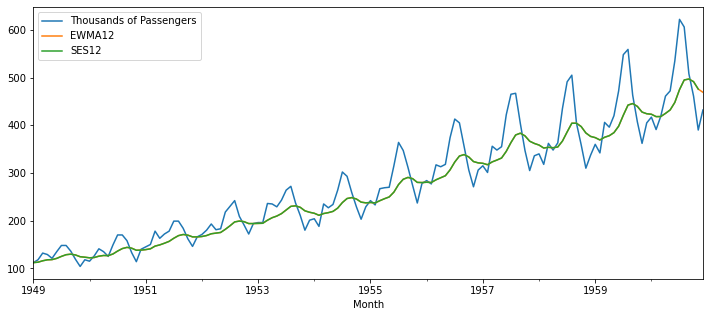

In [86]:
# 추세의 변화 양상이 점점 증가하느냐, 감소하는 지에 따라 trend 매개 변수를 설정해줌

df.plot();

- 천 명 단위의 승객 수, EWMA12와 SES12가 플롯 되어 있는데, EWMA12와 SES12는 같은 값이라 플롯됐고, 주황색 선이 보이지 않고 녹색선만 보이다가 오른쪽 끝에서 아주 살짝 주황색선이 보임
- 시계열 데이터가 기울어진 직선 모양의 추세를 보인다면 덧셈 모형을 사용해야함
- 반면, 시계열 데이터가 지수적으로 증가하거나 곡선형 추세를 보인다면 곱셈 모형을 사용함
- 덧셈모형이나 곱셈모형 모두 미래로 가며 증감이 없어지는 추세에서는 값을 과장하는 경향이 있어, 감쇠가 필요하기도 함

- 해당 그림에서는 시작 부분에서 거의 선형적으로 증가하다가, 마지막부분에서야 지수적 증가가 약간 보임
- 전반적으로 추세가 선형적이라고 생각하고, 덧셈 모형 사용

In [88]:
df['DES_add_12'] = ExponentialSmoothing(df['Thousands of Passengers'], trend='add').fit().fittedvalues.shift(-1)

In [89]:
df

,Thousands of Passengers,EWMA12,SES12,DES_add_12
Month,,,,
1949-01-01,112,112.000000,112.000000,114.102394
1949-02-01,118,112.923077,112.923077,120.040657
1949-03-01,132,115.857988,115.857988,134.001539
1949-04-01,129,117.879836,117.879836,131.085845
1949-05-01,121,118.359861,118.359861,123.110263
...,...,...,...,...
1960-08-01,606,494.898619,494.898619,608.168786
1960-09-01,508,496.914216,496.914216,510.571382
1960-10-01,461,491.388952,491.388952,463.313463


In [90]:
df.columns

Index(['Thousands of Passengers', 'EWMA12', 'SES12', 'DES_add_12'], dtype='object')

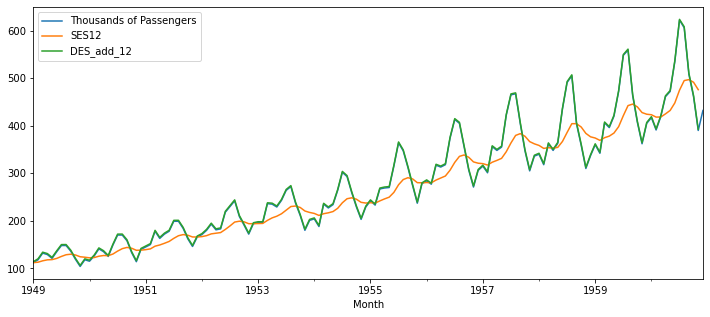

In [93]:
df[['Thousands of Passengers', 'SES12', 'DES_add_12']].plot();

Des_add_12의 결과가 실제 천 명 단위의 승객 수 데이터와 거의 같게 나옴을 알 수 있음

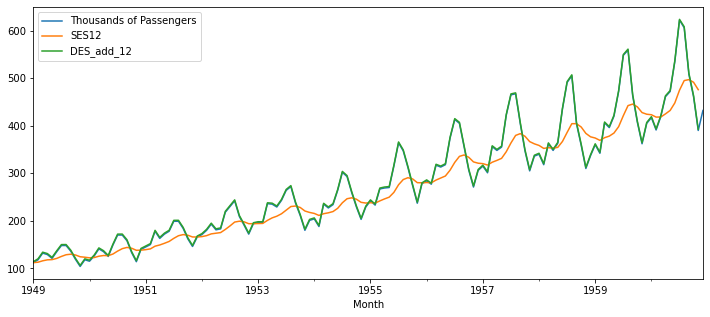

In [95]:
df[['Thousands of Passengers', 'SES12', 'DES_add_12']].plot(figsize=(12,5));

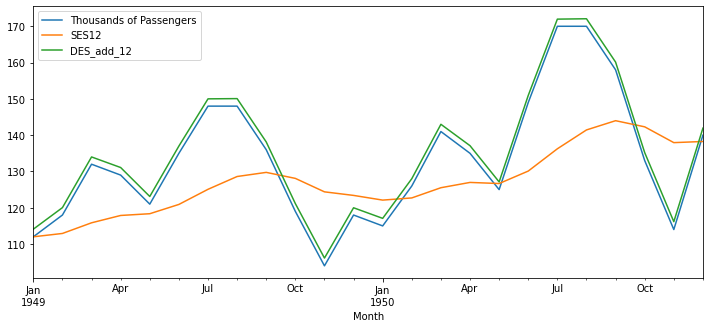

In [96]:
df[['Thousands of Passengers', 'SES12', 'DES_add_12']].iloc[:24].plot(figsize=(12,5));

- 첫 24개의 데이터 포인트, 즉 24개월 혹은 2년의 자료만 그렸을 때 차이를 더 잘 볼 수 있음
- 이중 지수 평활법이 원래 데이터인 천 명 단위의 승객 수와 잘 맞는 것을 볼 수 있음 

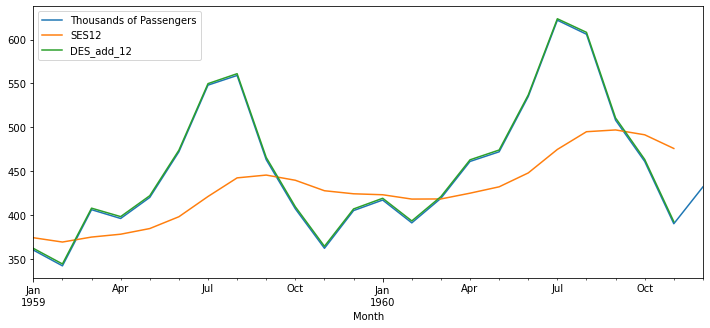

In [97]:
df[['Thousands of Passengers', 'SES12', 'DES_add_12']].iloc[-24:].plot(figsize=(12,5));

- 하나의 행을 추가 했으나, 단일 지수 평활법의 곡선보다 훨씬 잘 피팅 함
- 이중 지수 평활법이 시계열 데이터를 훨씬 더 잘 표현함

In [98]:
# 곱셈모형 사용해보기

df['DES_mul_12'] = ExponentialSmoothing(df['Thousands of Passengers'], trend='mul').fit().fittedvalues.shift(-1)
df

,Thousands of Passengers,EWMA12,SES12,DES_add_12,DES_mul_12
Month,,,,,
1949-01-01,112,112.000000,112.000000,114.102394,113.990701
1949-02-01,118,112.923077,112.923077,120.040657,120.031669
1949-03-01,132,115.857988,115.857988,134.001539,134.235979
1949-04-01,129,117.879836,117.879836,131.085845,131.270786
1949-05-01,121,118.359861,118.359861,123.110263,123.156267
...,...,...,...,...,...
1960-08-01,606,494.898619,494.898619,608.168786,616.673652
1960-09-01,508,496.914216,496.914216,510.571382,517.378618
1960-10-01,461,491.388952,491.388952,463.313463,469.290950


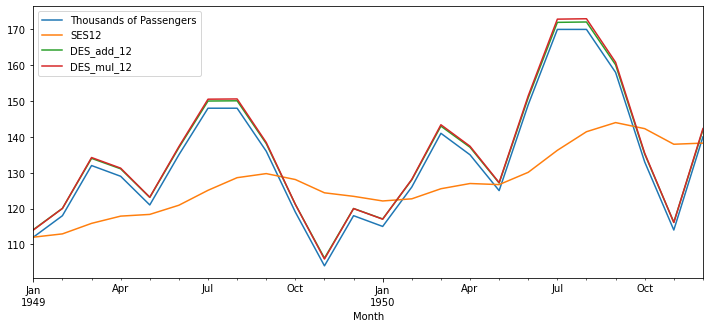

In [101]:
df[['Thousands of Passengers', 'SES12', 'DES_add_12', 'DES_mul_12']].iloc[:24].plot(figsize=(12,5));

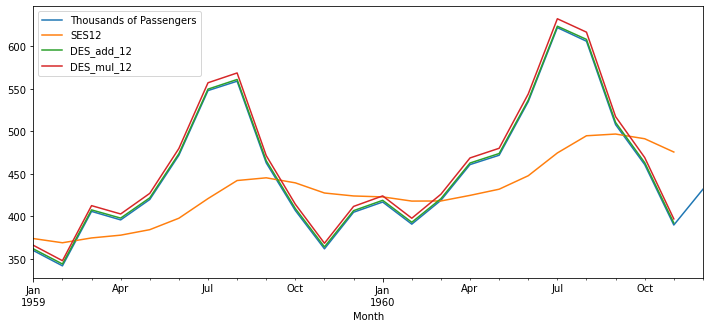

In [99]:
df[['Thousands of Passengers', 'SES12', 'DES_add_12', 'DES_mul_12']].iloc[-24:].plot(figsize=(12,5));

- 빨간 선이 곱셈 모형인데, 파란 선인 실제 데이터에 겹쳐 있음. 곱셈 모형을 사용해야 하는 이유
- 가장 최근의 데이터와 가장 오래된 데이터 모두 잘 피팅하기 때문에, 이 데이터는 선형적 증가가 아니라 `곱셈 모형` 이용

#### 삼중 지수 평활법

- 데이터의 추세 뿐 아니라, 계절성 요소까지 확인할 수 있어 홀트-윈터스 계절성 기법과 연계된 삼중 지수 평활법
 > - 삼중 지수 평활법이라 계절성에 대해서도 덧셈, 곱셈 모형을 정해줘야함
 > - 계절성 요소가 시간이 지남에 따라 선형적인지 혹은 변화하는지 확인해야 함
 > - 가능한 조합이 여러개가 있어 많은 사람들은 여러 모형을 시험해보고, 수치를 이용해 어떤 것이 제일 맞는지 결정함

In [102]:
df['TES_mul_12'] = ExponentialSmoothing(df['Thousands of Passengers'], trend='mul', seasonal='mul', seasonal_periods=12).fit().fittedvalues

C:\Users\PC\anaconda3\envs\vmconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [103]:
df

,Thousands of Passengers,EWMA12,SES12,DES_add_12,DES_mul_12,TES_mul_12
Month,,,,,,
1949-01-01,112,112.000000,112.000000,114.102394,113.990701,111.595700
1949-02-01,118,112.923077,112.923077,120.040657,120.031669,118.842144
1949-03-01,132,115.857988,115.857988,134.001539,134.235979,133.334174
1949-04-01,129,117.879836,117.879836,131.085845,131.270786,127.899693
1949-05-01,121,118.359861,118.359861,123.110263,123.156267,120.979990
...,...,...,...,...,...,...
1960-08-01,606,494.898619,494.898619,608.168786,616.673652,629.401572
1960-09-01,508,496.914216,496.914216,510.571382,517.378618,512.000088
1960-10-01,461,491.388952,491.388952,463.313463,469.290950,448.034797


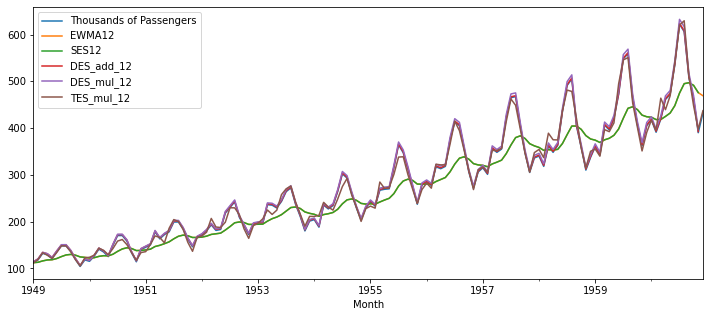

In [104]:
df.plot();

<AxesSubplot:xlabel='Month'>

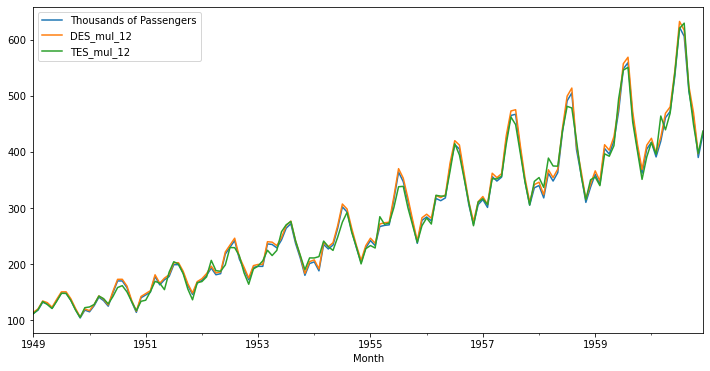

In [107]:
df[['Thousands of Passengers', 'DES_mul_12', 'TES_mul_12']].plot(figsize=(12,6))

- 천 명 단위 승객 수와 곱셈 모형을 이용한 이주 평활 모형, 곱셈 모형을 이용한 삼중 지수 평활 모형

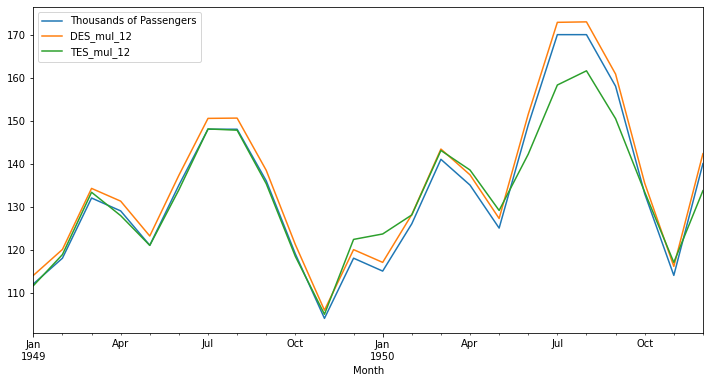

In [108]:
df[['Thousands of Passengers', 'DES_mul_12', 'TES_mul_12']].iloc[:24].plot(figsize=(12,6));

-  삼중 지수 평활법이 이주 지수 평활법보다 원래 데이터인 천명 단위 승객 수에서 조금 더 떨어져 있어서 좋지 않은 결과가 나오는 것처럼 보임
- 이중 지수 평활법의 결과가 원래 데이터와 겹쳐져 있음

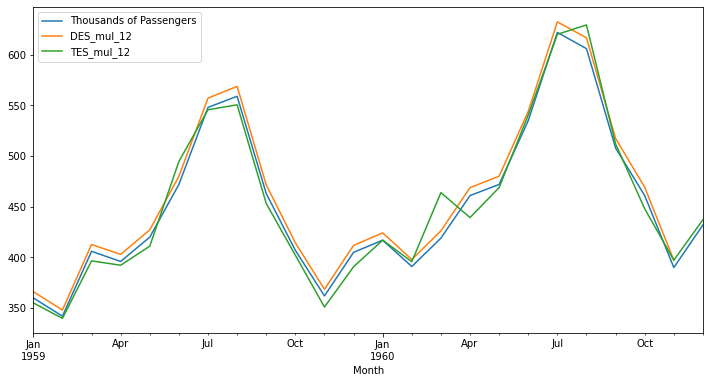

In [109]:
df[['Thousands of Passengers', 'DES_mul_12', 'TES_mul_12']].iloc[-24:].plot(figsize=(12,6));

- 이중지수 평활법보다 좋지 않은 결과를 나타내지 못한다고 할 수 있으나, 예측 할 때는 계쩔적 변동까지 예측할 수 있는 능력이 예측 정확성을 올려줌
- 이 데이터의 가장 앞부분, 시작하는 부분 첫 2년의 자료에 대해 피팅해보면 첫 2년동안 더 단순한 모형이 좋은 결과를 보여주나, 가장 최근 2년 데이터를 보면 삼중 지수 평활법 결과인 초록선이 실제 데이터선이 파란색 선에 점점 근접해감
- 예측에 있어서는 계절적 변동을 예측할 수 있는 삼중 지수 평활법이 더 적합해보임
- 계절성을 예측하는 것은 예측 능력을 크게 향상시킴

> 정리
> * statsmodels을 이용해 모델을 만들고, datetime 인덱스 변수 넣어주기, freq요소를 데이터셋에 맞게 정해줌,
> * 모형을 피팅하고, 다양한 매개변수들을 입력하고, 모형을 피팅한 다음 fittedvalues로 값을 가져옴
> * 모형에 따라 shift로 한 칸 씩 이동할 수 도 있음